11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
422/422 - 8s - 20ms/step - accuracy: 0.9281 - loss: 0.2607 - val_accuracy: 0.9633 - val_loss: 0.1298
Epoch 2/10
422/422 - 1s - 3ms/step - accuracy: 0.9753 - loss: 0.0836 - val_accuracy: 0.9783 - val_loss: 0.0732
Epoch 3/10
422/422 - 1s - 3ms/step - accuracy: 0.9840 - loss: 0.0536 - val_accuracy: 0.9812 - val_loss: 0.0638
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.9881 - loss: 0.0379 - val_accuracy: 0.9792 - val_loss: 0.0721
Epoch 5/10
422/422 - 1s - 3ms/step - accuracy: 0.9912 - loss: 0.0288 - val_accuracy: 0.9793 - val_loss: 0.0758
Epoch 6/10
422/422 - 1s - 3ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9773 - val_loss: 0.0879
Epoch 7/10
422/422 - 1s - 3ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9793 - val_loss: 0.0780
Epoch 8/10
422/422 - 1s - 3ms/step - accuracy: 0.9940 - loss: 0.0180 - val_accuracy: 0.9815 - val_loss: 0.0679
Epoch 9/10
422/422 - 1s - 3ms/step - accuracy: 0.9943 - loss

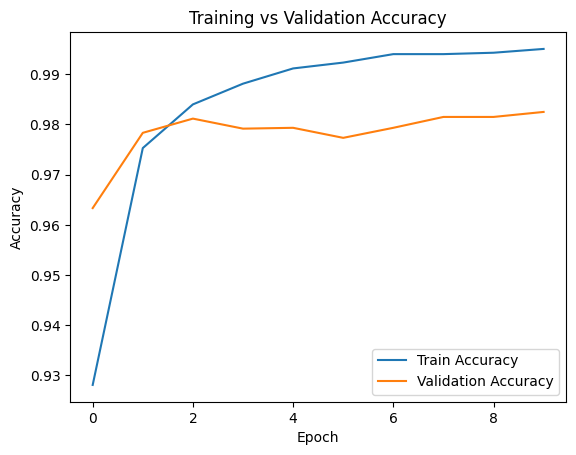

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Build model with Batch Normalization
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128,
                    verbose=2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()
